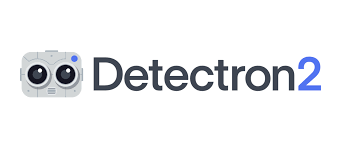

## Prepare Environment

In [10]:
# install dependencies: 
!pip install pyyaml==5.1
#import torch, torchvision
#print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

gcc (i686-posix-dwarf-rev0, Built by MinGW-W64 project) 12.2.0
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [11]:
#  !pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.0+cu101 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu113, 1.11.0+cu115, 1.12.0, 1.12.0+cpu, 1.12.0+cu113, 1.12.0+cu116, 1.12.1, 1.12.1+cpu, 1.12.1+cu113, 1.12.1+cu116, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117)
ERROR: No matching distribution found for torch==1.8.0+cu101


In [13]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

     ------------------------------------ 167.3/167.3 MB 763.6 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ---------------------------------------- 2.4/2.4 GB 638.7 kB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 1.5 MB/s eta 0:00:00


In [18]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!python -m pip install detectron2 -f \https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

AssertionError: 

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog

## Load Image

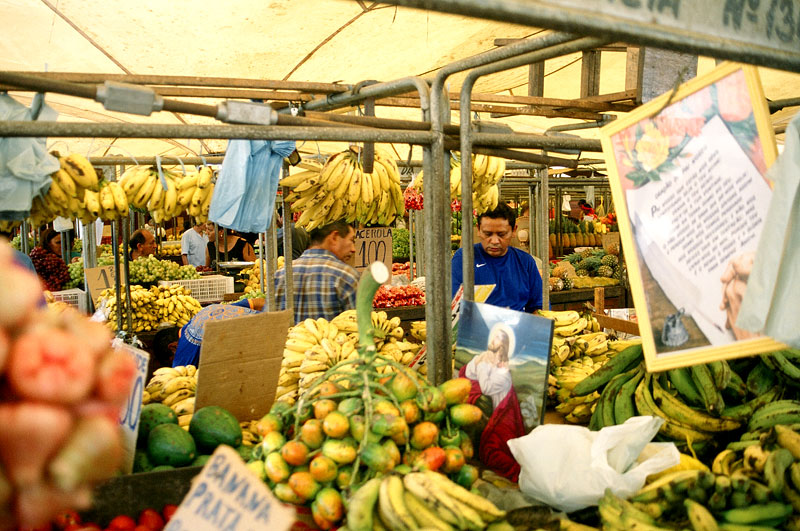

In [ ]:
# read image
path_image_color = "/path/to/image"
im = cv2.imread(path_image_color)
cv2_imshow(im)


## Object Detection

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [ ]:
outputs = predictor(im)
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
pred_class_names = list(map(lambda x: class_names[x], outputs["instances"].pred_classes))
print(pred_class_names)

tensor([ 0,  0,  0,  0, 46, 46,  0,  0, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46,
        46, 46, 46, 73, 46, 46, 46, 46, 46, 46, 46, 46], device='cuda:0')
Boxes(tensor([[450.2407, 205.9014, 545.9877, 317.7084],
        [267.7285, 218.4765, 360.9700, 326.3389],
        [ 29.4075, 227.2961,  69.8739, 292.5563],
        [181.2733, 219.3131, 212.4705, 266.6955],
        [152.8839, 285.1325, 200.6663, 327.4018],
        [119.8185, 156.7285, 182.7488, 223.0863],
        [127.6933, 228.0163, 156.6667, 260.2308],
        [209.1194, 225.0752, 255.1134, 264.0728],
        [374.1559, 282.8329, 425.5151, 309.2709],
        [142.7968, 364.3014, 200.1209, 416.9472],
        [ 29.9967, 144.9792, 100.4222, 225.6769],
        [294.2309, 142.9332, 406.8332, 232.2973],
        [447.7189, 152.6300, 506.9825, 212.4921],
        [358.7840, 466.6508, 507.7011, 528.9041],
        [173.9334, 162.8623, 218.4662, 220.2411],
        [652.9819, 379.7451, 743.0360, 443.7658],
        [ 82.9488, 179.5453, 129.5907, 2

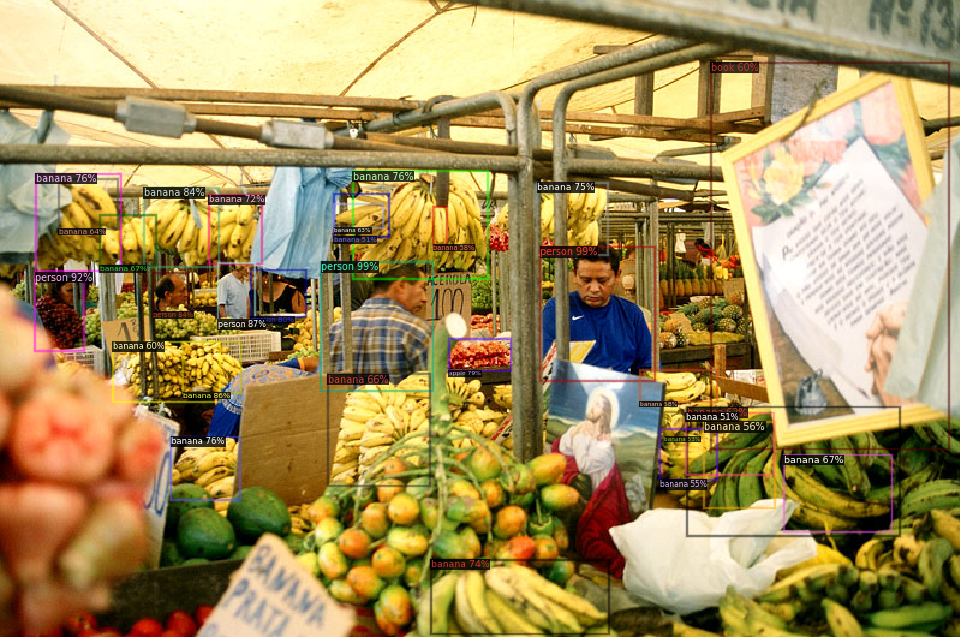

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## Keypoints

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:16, 14.3MB/s]                           


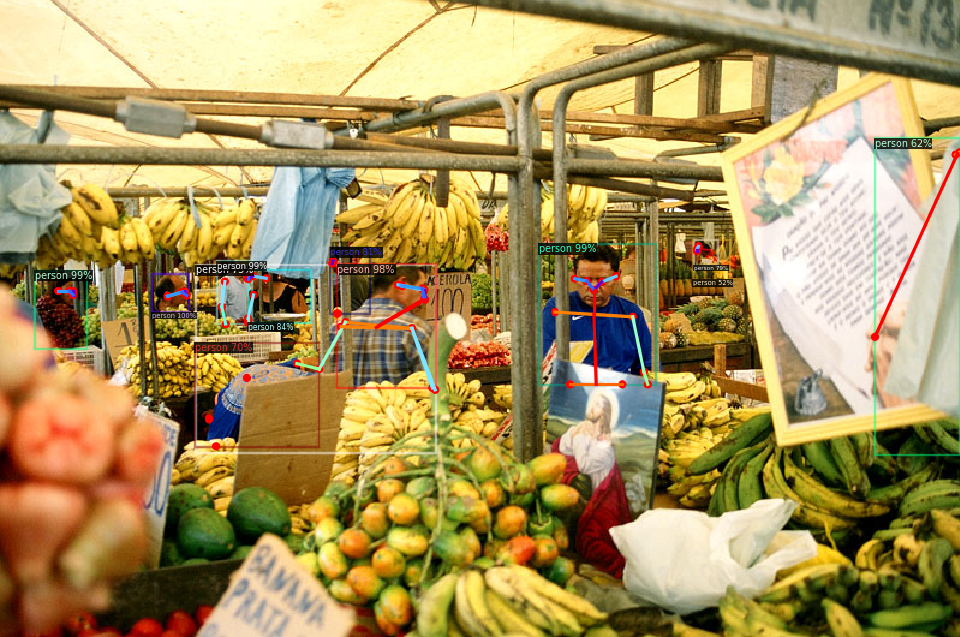

In [ ]:
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## Instance Segmentation

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

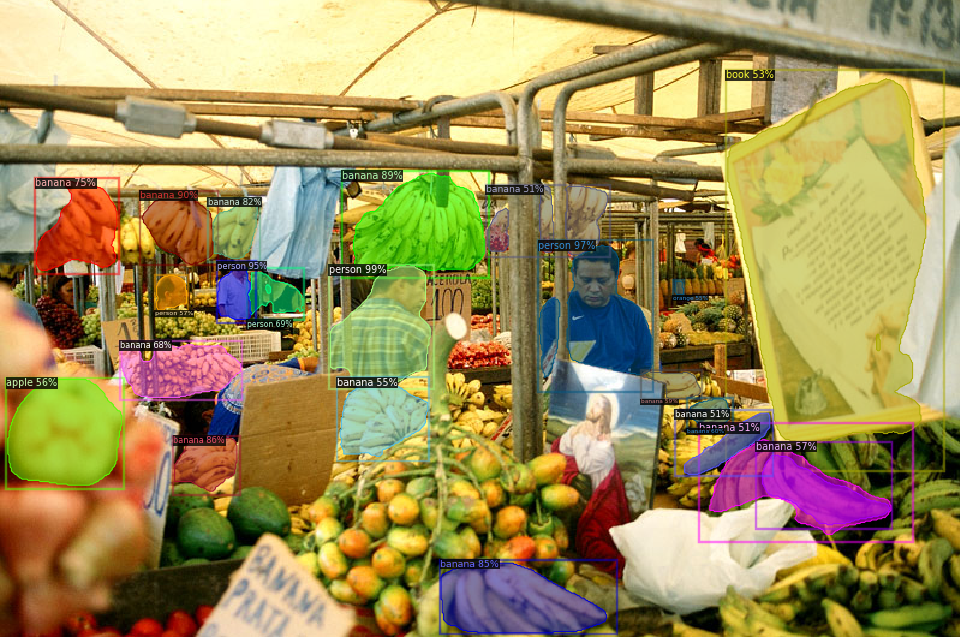

In [ ]:
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

## Panoptic Segmentation

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

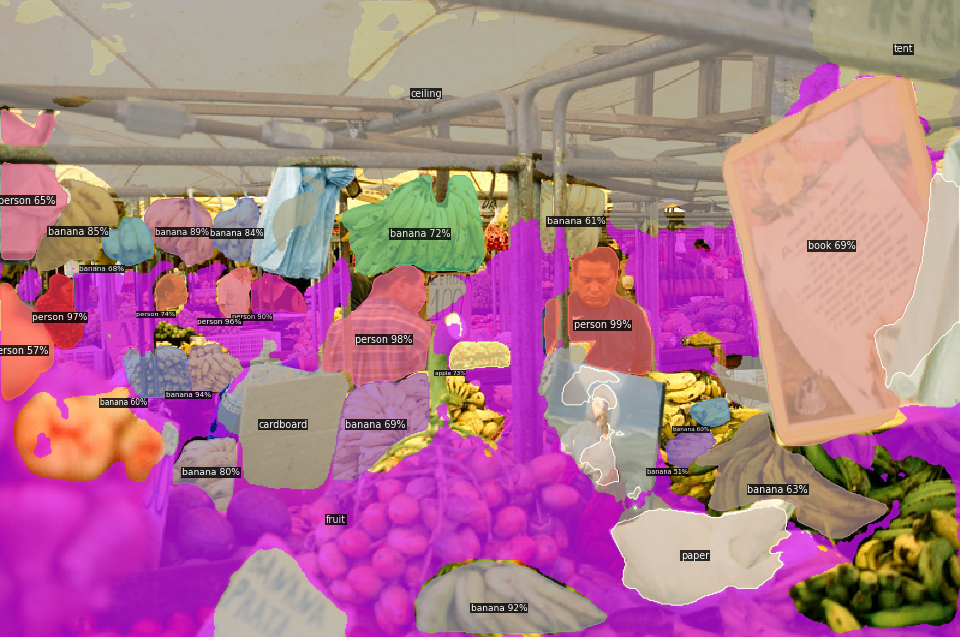

In [ ]:
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])